# 가. 주말간 해외지수 변동에 따른 코스피 변동 예측
- 국내 주식시장의 휴장기간동안 해외 지수 변동을 확인
- 국내 주식시장 개장일에 휴장기간동안 해외 지수 변동에 따른 국내 주식시장 변동을 예측

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import FinanceDataReader as fdr

import os

## 1. 지수 데이터 전처리

### 데이터 불러오기

In [73]:
nasdaq = pd.read_csv('./nasdaq.csv', index_col=0, parse_dates=True)
snp = pd.read_csv('./snp500.csv', index_col=0, parse_dates=True)
ftse = pd.read_csv('./ftse.csv', index_col=0, parse_dates=True)
dax = pd.read_csv('./dax.csv', index_col=0, parse_dates=True)
nikkei = pd.read_csv('./nikkei.csv', index_col=1, parse_dates=True)
hangseng = pd.read_csv('./hang.csv', index_col=0, parse_dates=True)
sanghai = pd.read_csv('./sanghai.csv', index_col=0, parse_dates=True)
kospi = pd.read_csv('./kospi.csv', index_col=0, parse_dates=True)
kosdaq = pd.read_csv('./kosdaq.csv', index_col=0, parse_dates=True)

### 날짜 순으로 정렬

In [74]:
nasdaq.sort_index(inplace=True)
snp.sort_index(inplace=True)
ftse.sort_index(inplace=True)
dax.sort_index(inplace=True)
nikkei.sort_index(inplace=True)
hangseng.sort_index(inplace=True)
sanghai.sort_index(inplace=True)
kospi.sort_index(inplace=True)
kosdaq.sort_index(inplace=True)

### object값들을 float으로 변경

In [75]:
nasdaq['Close'] = nasdaq.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['Close'] = dax.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['Close'] = nikkei['종가'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['Close'] = hangseng.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))

nasdaq['Open'] = nasdaq.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['Open'] = dax.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['Open'] = nikkei['오픈'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['Open'] = hangseng.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))

### 일별 수익률, 고점대비 종가, 저가 및 고가 대비 종가의 비율을 사용
- 해외 지수의 경우 종가기준의 변화율, 고가대비 종가비율, 저가 및 고가 대비 종가의 비율을 사용
- 한국의 경우 종가기준의 변화율과 함께, 전일 종가 대비 당일 시작가의 변동률을 사용

In [76]:
nasdaq['NASDAQ'] = nasdaq.Close.pct_change() 
snp['S&P500'] = snp.Close.pct_change()
ftse['FTSE'] = ftse.Close.pct_change()
dax['DAX'] = dax.Close.pct_change()
nikkei['NIKKEI'] = nikkei.Close.pct_change()
hangseng['HANGSENG'] = hangseng.Close.pct_change()
sanghai['SANGHAI'] = sanghai.Close.pct_change()
kospi['KOSPI_x'] = kospi.Close.pct_change()
kospi['KOSPI_y'] = (kospi.Open - kospi.Close.shift(1)) / kospi.Close.shift(1)

### 각 지수의 일별 수익률 값들을 연속된 날짜에 맞춰서 병합

In [77]:
change_dfs = [nasdaq['NASDAQ'], snp['S&P500'], ftse['FTSE'], dax['DAX'], nikkei['NIKKEI'],
              hangseng['HANGSENG'], sanghai['SANGHAI'],kospi['KOSPI_x'], kospi['KOSPI_y']]

In [78]:
final_df = pd.concat(change_dfs, axis=1, join='outer')

In [79]:
final_df = pd.merge(pd.DataFrame(pd.date_range('2001-01-01', '2021-11-11')).set_index(0),final_df,how='outer', left_index=True, right_index=True)

In [80]:
final_df.head(15)

,NASDAQ,S&P500,FTSE,DAX,NIKKEI,HANGSENG,SANGHAI,KOSPI_x,KOSPI_y
2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,0.141716,0.050099,NaN,NaN,NaN,-0.018854,0.009713,0.000921,-0.015760
2001-01-04,-0.019070,-0.010552,0.024123,-0.009079,NaN,0.044240,-0.003056,0.070172,0.057726
2001-01-05,-0.062023,-0.026242,0.002021,0.000905,NaN,0.013953,0.003726,0.040913,0.002724
2001-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,-0.004860,-0.001918,-0.007825,0.001545,NaN,-0.000717,-0.010935,0.009985,-0.012275
2001-01-09,0.018949,0.003812,-0.010001,0.001932,-0.018540,0.004150,-0.000438,0.005574,-0.004773
2001-01-10,0.033957,0.009586,-0.004517,-0.013186,-0.013068,-0.004180,0.011646,-0.049346,-0.005577


### 시차 보정을 위해서 미국, 영국, 독일 지수들 하루씩 미루기

In [81]:
final_df['NASDAQ'] = final_df['NASDAQ'].shift(1)
final_df['S&P500'] = final_df['S&P500'].shift(1)
final_df['FTSE'] = final_df['FTSE'].shift(1)
final_df['DAX'] = final_df['DAX'].shift(1)

### null값 처리

In [82]:
final_df['NASDAQ'].fillna(0, inplace=True)
final_df['S&P500'].fillna(0, inplace=True)
final_df['FTSE'].fillna(0, inplace=True)
final_df['DAX'].fillna(0, inplace=True)
final_df['NIKKEI'].fillna(0, inplace=True)
final_df['HANGSENG'].fillna(0, inplace=True)
final_df['SANGHAI'].fillna(0, inplace=True)
final_df['KOSPI_x'].fillna(0, inplace=True)

### 분석을 위한 날짜 데이터만 가져오기
- 2001-01-03 ~ 2021-11-11 기간을 데이터로 사용

In [31]:
final_df = final_df.loc['2001-01-03':'2021-11-11']

In [32]:
final_df.head(15)

,NASDAQ,S&P500,FTSE,DAX,NIKKEI,HANGSENG,SANGHAI,KOSPI_x,KOSPI_y
2001-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,-0.018854,0.009713,0.000921,-0.015760
2001-01-04,0.141716,0.050099,0.000000,0.000000,0.000000,0.044240,-0.003056,0.070172,0.057726
2001-01-05,-0.019070,-0.010552,0.024123,-0.009079,0.000000,0.013953,0.003726,0.040913,0.002724
2001-01-06,-0.062023,-0.026242,0.002021,0.000905,0.000000,0.000000,0.000000,0.000000,NaN
2001-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2001-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000717,-0.010935,0.009985,-0.012275
2001-01-09,-0.004860,-0.001918,-0.007825,0.001545,-0.018540,0.004150,-0.000438,0.005574,-0.004773
2001-01-10,0.018949,0.003812,-0.010001,0.001932,-0.013068,-0.004180,0.011646,-0.049346,-0.005577
2001-01-11,0.033957,0.009586,-0.004517,-0.013186,-0.017240,-0.022352,-0.003044,0.001747,0.013284
2001-01-12,0.046114,0.010318,0.008960,0.022965,0.011110,0.013561,-0.006790,0.046423,0.030545


## 2. EDA

### 지수별 상관관계 확인
- 특이사항
  - 종가기준의 변동률에서 코스피와 나스닥의 상관관계는 낮게 나옴.  
  - 하지만 나스닥, S&P500의 변동률과 KOSPI의 전일 종가대비 당일 시작가 변동률은 상관관계가 높게나옴.

<AxesSubplot:>

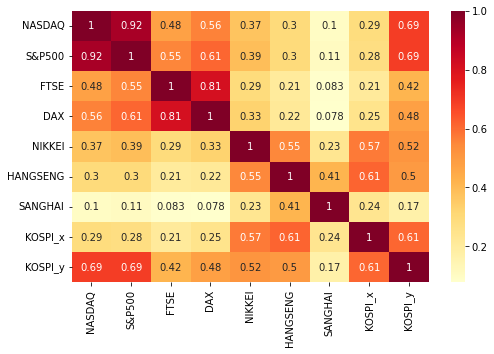

In [33]:
plt.figure(figsize=(8,5))
# sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(final_df.corr(), annot=True, cmap='YlOrRd')

### 이상치 확인

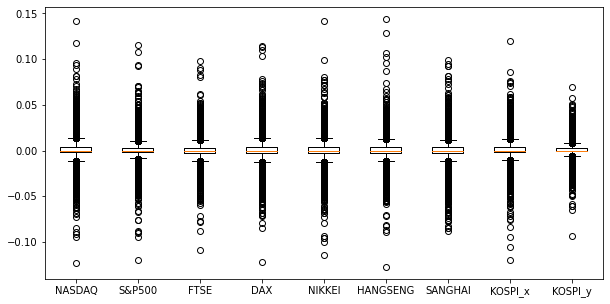

In [34]:
plt.figure(figsize=(10,5))
plt.boxplot(final_df.fillna(0), labels=final_df.fillna(0).columns)
plt.show()

## KOSPI 휴장 기간의 해외 지수 데이터 가져오기

### KOSPI 휴장일 목록 가져오기

In [35]:
holiday_index = final_df.KOSPI_y[final_df.KOSPI_y.isnull()].index

In [36]:
holiday_index

DatetimeIndex(['2001-01-06', '2001-01-07', '2001-01-13', '2001-01-14',
               '2001-01-20', '2001-01-21', '2001-01-23', '2001-01-24',
               '2001-01-25', '2001-01-27',
               ...
               '2021-10-10', '2021-10-11', '2021-10-16', '2021-10-17',
               '2021-10-23', '2021-10-24', '2021-10-30', '2021-10-31',
               '2021-11-06', '2021-11-07'],
              dtype='datetime64[ns]', length=2462, freq=None)

### 휴장일 날짜 목록을, 휴일 기간 데이터로 변환
- 2001-01-23, 2001-01-24, 2001-01-25와 같이 연속된 휴일기간을 묶어줌
- 2001-01-23 ~ 2001-01-25의 형태로 변환

In [37]:
from datetime import timedelta

In [38]:
# N번째 휴일의 시작 날짜, 처음 값을 0번째 인덱스 값으로 지정.
start_day = holiday_index[0]

# N번째 휴일의 종료 날짜
end_day = None

# 휴일기간을 담기위한 목록
holiday_list = []

for i in range(1, len(holiday_index)) :
    
    # N번째 휴일 날짜를 N-1번째 휴일 날짜와 비교해서, 날짜의 차이가 1일이면
    if (holiday_index[i] - holiday_index[i-1]) == timedelta(days=1) :
        
        # 연속된 휴일로 보고 휴일 종료 날짜를 +1일
        end_day = holiday_index[i]
        
    # N번째 휴일 날짜와 N-1번째 휴일 날짜를 비교해서, 날짜의 차이가 1일이 아니면 -> 새로운 휴일의 시작으로 보고 시작과 끝을 바꿔줌.
    else :
        
        # 새로운 휴일을 시작하기 전에 정해진(이전 휴일기간)의 시작과 끝 날짜를 리스트에 담아줌.
        holiday_list.append((start_day, end_day))
        
        # 새로운 휴일 시작 날짜를 새로 지정
        start_day = holiday_index[i]
        
        # 새로운 휴일 종료 날짜도 새로 지정
        end_day = holiday_index[i]

In [39]:
holiday_list

[(Timestamp('2001-01-06 00:00:00'), Timestamp('2001-01-07 00:00:00')),
 (Timestamp('2001-01-13 00:00:00'), Timestamp('2001-01-14 00:00:00')),
 (Timestamp('2001-01-20 00:00:00'), Timestamp('2001-01-21 00:00:00')),
 (Timestamp('2001-01-23 00:00:00'), Timestamp('2001-01-25 00:00:00')),
 (Timestamp('2001-01-27 00:00:00'), Timestamp('2001-01-28 00:00:00')),
 (Timestamp('2001-02-03 00:00:00'), Timestamp('2001-02-04 00:00:00')),
 (Timestamp('2001-02-10 00:00:00'), Timestamp('2001-02-11 00:00:00')),
 (Timestamp('2001-02-17 00:00:00'), Timestamp('2001-02-18 00:00:00')),
 (Timestamp('2001-02-24 00:00:00'), Timestamp('2001-02-25 00:00:00')),
 (Timestamp('2001-03-01 00:00:00'), Timestamp('2001-03-01 00:00:00')),
 (Timestamp('2001-03-03 00:00:00'), Timestamp('2001-03-04 00:00:00')),
 (Timestamp('2001-03-10 00:00:00'), Timestamp('2001-03-11 00:00:00')),
 (Timestamp('2001-03-17 00:00:00'), Timestamp('2001-03-18 00:00:00')),
 (Timestamp('2001-03-24 00:00:00'), Timestamp('2001-03-25 00:00:00')),
 (Time

In [40]:
len(holiday_list)

1188

In [41]:
final_df.head(20)

,NASDAQ,S&P500,FTSE,DAX,NIKKEI,HANGSENG,SANGHAI,KOSPI_x,KOSPI_y
2001-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,-0.018854,0.009713,0.000921,-0.015760
2001-01-04,0.141716,0.050099,0.000000,0.000000,0.000000,0.044240,-0.003056,0.070172,0.057726
2001-01-05,-0.019070,-0.010552,0.024123,-0.009079,0.000000,0.013953,0.003726,0.040913,0.002724
2001-01-06,-0.062023,-0.026242,0.002021,0.000905,0.000000,0.000000,0.000000,0.000000,NaN
2001-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2001-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000717,-0.010935,0.009985,-0.012275
2001-01-09,-0.004860,-0.001918,-0.007825,0.001545,-0.018540,0.004150,-0.000438,0.005574,-0.004773
2001-01-10,0.018949,0.003812,-0.010001,0.001932,-0.013068,-0.004180,0.011646,-0.049346,-0.005577
2001-01-11,0.033957,0.009586,-0.004517,-0.013186,-0.017240,-0.022352,-0.003044,0.001747,0.013284
2001-01-12,0.046114,0.010318,0.008960,0.022965,0.011110,0.013561,-0.006790,0.046423,0.030545


### 휴장일 기간동안 해외지수의 누적 수익률 가져오기

In [42]:
one_day = timedelta(days=1)

X = []
y = []

for idx in range(len(holiday_list)) :
    
    #휴일 시작일
    holiday_start = holiday_list[idx][0]
    
    #휴일 종료일
    holiday_end = holiday_list[idx][1]
    
    # 타겟 날짜(휴일 다음날의 날짜)
    target_day = holiday_end + one_day
    
    # 휴일기간 및 D+1일 지수 변동 데이터
    n_holiday = final_df.loc[holiday_start : target_day]
    
    # 휴일 기간 동안 지수들의 누적 변동률
    n_holiday_change = (n_holiday + 1).cumprod() - 1
    
    # 휴일 다음날의 누적 변동률
    datas = n_holiday_change.loc[target_day]

    # KOSPI, KOSDAQ을 제외한 지수들의 누적수익률 데이터
    X_data = datas.drop(['KOSPI_y', 'KOSPI_x'])
    X_data['KOSPI'] = final_df.loc[holiday_start - one_day]['KOSPI_x']

    # D+1일 KOSPI의 실제 수익률 y
    y_data = datas['KOSPI_y']

#     if abs(X_data).max() >= 0.015:
    X.append(X_data.values)
    y.append(y_data)

In [43]:
X

[array([-0.06202275, -0.02624237,  0.00202082,  0.00090488,  0.        ,
        -0.00071726, -0.01093493,  0.04091251]),
 array([-0.0053397 , -0.00623295,  0.00827487,  0.00383901,  0.01187392,
        -0.00010853, -0.03435562,  0.04642304]),
 array([ 6.86292216e-04, -4.02827956e-03, -9.66199134e-05,  2.37651754e-03,
         3.09526260e-03,  1.04006954e-02,  0.00000000e+00,  2.60408907e-02]),
 array([-0.00581144,  0.01115051,  0.00745656,  0.01141993, -0.02397021,
        -0.00342003,  0.        ,  0.01237536]),
 array([ 0.00980285, -0.00188581,  0.00618646, -0.00479971,  0.0108951 ,
         0.00346605,  0.        , -0.05692884]),
 array([-0.04394854, -0.01747399,  0.00073579, -0.00991546, -0.02321356,
        -0.01496146, -0.02787554, -0.00623877]),
 array([-0.03555677, -0.01333553, -0.00673531, -0.0210553 ,  0.        ,
        -0.01135052,  0.00217172,  0.00659263]),
 array([-0.0499432 , -0.01890533, -0.01768341, -0.02312161, -0.00424273,
        -0.00891537,  0.01317741,  0.0021

In [44]:
y

[-0.012275114056985448,
 0.012230595199618888,
 0.004420923553519085,
 -0.00600844688819846,
 0.0017237591469081437,
 -0.022301472521693455,
 -0.013182863956202717,
 -0.015307809297097075,
 0.002810529202083911,
 -0.006037017816986734,
 -0.01817889317889332,
 -0.020149886877828038,
 -0.012679376984053192,
 0.012602933249065806,
 -0.005083903520507804,
 0.049362960562296054,
 -0.006222590968353758,
 -0.0030032939352839794,
 0.00503334591669824,
 0.015827389828072524,
 0.015432312595261122,
 0.00560109289617472,
 0.0035502349672418276,
 0.010540513537816043,
 -0.006264921247856936,
 0.0032780404236743,
 -0.005655389351805318,
 -0.014989224484544317,
 -0.0021002972728448865,
 -0.0028543767109568963,
 -0.003528640801169547,
 -0.02281605420541355,
 0.005360170650330787,
 0.0036616690652726547,
 -0.005039891391270479,
 0.0017555855339752569,
 -0.006980956232745528,
 0.005654193827205001,
 -0.010326604868751477,
 -0.020843732250124813,
 0.014315574994291591,
 -0.0001651042908771272,
 -0.01277

In [45]:
len(X), len(y)

(1188, 1188)

### Train_Data, Test_Data 나누기
- 지수예측이긴 하지만 시계열 데이터를 사용해 예측하는 것이 아니고, 예측 데이터가 각기 다른 날짜이기때문에 train_test_split 사용

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [49]:
X_train

[array([-0.01165728, -0.00944998,  0.00430744,  0.00259686, -0.01135641,
         0.        ,  0.010938  ,  0.00596108]),
 array([-0.0124036 , -0.00738777, -0.01325496, -0.00598197,  0.00262213,
        -0.00155816,  0.00161227, -0.03402267]),
 array([-0.00252239, -0.00382825, -0.00042392, -0.00085036,  0.01585031,
         0.01652676,  0.0286506 ,  0.00066576]),
 array([-0.00041454,  0.00340324,  0.00359568, -0.0042958 , -0.01517048,
        -0.00046056,  0.00481211,  0.00687849]),
 array([0.01934946, 0.01666986, 0.01394667, 0.01696236, 0.        ,
        0.01816634, 0.02596741, 0.01840737]),
 array([0.02030014, 0.02994804, 0.02208239, 0.01752403, 0.        ,
        0.02768565, 0.01273873, 0.02085646]),
 array([ 0.01119844,  0.00608201,  0.0049984 ,  0.00626427, -0.0217435 ,
        -0.01477347, -0.01643131, -0.05726584]),
 array([-0.04114053, -0.03591978, -0.03146211, -0.0682332 ,  0.02388908,
        -0.00157114,  0.01450799, -0.0309406 ]),
 array([-0.00931647, -0.00707693, -0.008

## 3. Regression 모델을 통한 확인

In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm

### LinearRegression, Ridge, RandomForest, GradientBoosting, LGBM 이용

In [51]:
lr = LinearRegression()
ridge = Ridge()
rfr = RandomForestRegressor(max_depth=9, max_features='sqrt', min_samples_split=0.01,
                      n_estimators=150)
gbr = GradientBoostingRegressor(min_samples_leaf=4, min_samples_split=0.1)
lgbm = lightgbm.LGBMRegressor(boosting='gbdt', learning_rate=0.01, max_depth=3,
              n_estimators=500)

In [52]:
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
rfr.fit(X_train, y_train)
gbr.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


LGBMRegressor(boosting='gbdt', learning_rate=0.01, max_depth=3,
              n_estimators=500)

### 각 모델별 결과 확인
- Ridge의 예측이 안좋음.
- Forest계열은 유사하게 나옴

In [53]:
print('---------- train ----------')
print('LinearRegression:',lr.score(X_train, y_train))
print('Ridge:',ridge.score(X_train, y_train))
print('RandomForest:',rfr.score(X_train, y_train))
print('GradientBoosting:',gbr.score(X_train, y_train))
print('LGBM:',lgbm.score(X_train, y_train))

print('---------- test ----------')
print('LinearRegression:',lr.score(X_test, y_test))
print('Ridge:',ridge.score(X_test, y_test))
print('RandomForest:',rfr.score(X_test, y_test))
print('GradientBoosting:',gbr.score(X_test, y_test))
print('LGBM:',lgbm.score(X_test, y_test))

---------- train ----------
LinearRegression: 0.621772369035678
Ridge: 0.394040007052043
RandomForest: 0.8082932436327929
GradientBoosting: 0.7992889644071655
LGBM: 0.7274942504066644
---------- test ----------
LinearRegression: 0.7305815439203043
Ridge: 0.4390910329673936
RandomForest: 0.71281254154639
GradientBoosting: 0.6750571265348213
LGBM: 0.6817429377349722


In [54]:
lr_preds = lr.predict(X_test)
ridge_preds = ridge.predict(X_test)
rfr_preds = rfr.predict(X_test)
gbr_preds = gbr.predict(X_test)
lgbm_preds = lgbm.predict(X_test)

In [55]:
len(y_test), len(lr_preds)

(119, 119)

### 결과 시각화

In [56]:
score_dict = {
    'lr' : lr_preds,
    'ridge' : ridge_preds,
    'gbr' : gbr_preds,
    'rfr' : rfr_preds,
    'lgbm' : lgbm_preds,
    'real' : y_test
}

- X축을 실제값, Y축을 예측값으로 하여 그래프 형성
- 기울기가 1인 직선에 근접하여 나올수록 정확한 예측

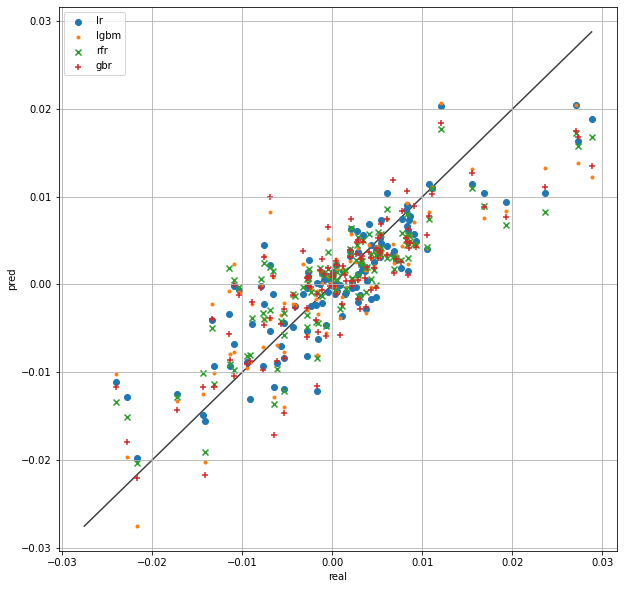

In [57]:
pred_df = pd.DataFrame(score_dict)
lims = [
    np.min([pred_df.min().min(), pred_df.min().min()]),  # min of both axes
    np.max([pred_df.max().max(), pred_df.max().max()]),  # max of both axes
]

# now plot both limits against eachother
plt.figure(figsize=(10,10))
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.scatter(pred_df.real, pred_df.lr, marker='o', label='lr')
plt.scatter(pred_df.real, pred_df.lgbm, marker='.', label='lgbm')
plt.scatter(pred_df.real, pred_df.rfr, marker='x', label='rfr')
plt.scatter(pred_df.real, pred_df.gbr, marker='+', label='gbr')
plt.xlabel('real')
plt.ylabel('pred')
plt.grid()
plt.legend()
plt.show()

### RandomForest의 예측에 사용된 feature 중요도 확인.

<AxesSubplot:>

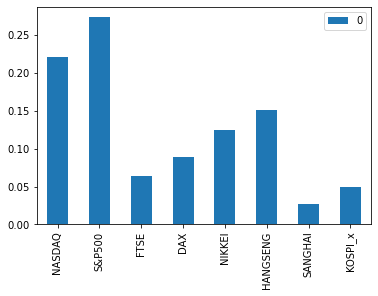

In [58]:
cols = ['NASDAQ', 'S&P500', 'FTSE', 'DAX', 'NIKKEI', 'HANGSENG', 'SANGHAI', 'KOSPI_x']

pd.DataFrame(rfr.feature_importances_, index = cols).plot(kind='bar')

## 파라미터 튜닝

### RandomForest

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [116]:
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
    'min_samples_leaf' : [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap' : [True, False]

}

In [117]:
kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,)

In [118]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2)

In [119]:
%%time
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_sampl

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.2s
[CV] END bootstra

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=150; total time=   0.4s
[CV] END boot

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   0.8s
[CV] END bootstrap=

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.3s
[CV] END boot

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=150; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=200; total time=   0.5s
[CV] END boot

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, 

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, 

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, m

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.05, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, max_depth=6,

[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.05, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.05, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.05, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=9

[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=250; total time=   0.4s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, ma

[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, m

[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, 

[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, max_depth=9, ma

[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, 

[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=250; total time=   0.6s
[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=150; total time=   0.3s
[CV] END bootstrap=True, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_d

[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=9,

[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.1, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=200; total time=   1.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   1.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   1.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   1.0s
[CV] E

[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.1, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.1, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_

[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.01, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.01, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.01, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   0.3s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, ma

[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.1, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.1, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   1.3s
[CV] END boots

[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.1, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.1, n_estimators=150; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.1, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.1, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, 

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=150; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=200; total time=   1.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   1.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=150; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=0.05, n_estimators=200; total time=   0.8s
[CV] E

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=0.1, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=0.1, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   0.7s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=250; total time=   0.9s
[CV] END bootstrap=False, max_d

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=250; total time=   0.7s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=0.1, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.01, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=150; total time=   0.4s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.05, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_de

[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   0.9s
[CV] END bootstrap=False, max_

CPU times: user 1min 42s, sys: 1.92 s, total: 1min 44s
Wall time: 4min 48s


GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 6, 9, 12],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 150, 200, 250]},
             verbose=2)

In [120]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=0.01, n_estimators=250)

### GradientBoosting

In [83]:
gbr_params = {'learning_rate':[0.15,0.1,0.01,0.001],
              'n_estimators':[100,250,500],
              'max_depth':[3,5,7,9],
              'min_samples_split': [0.01, 0.05, 0.1],
              'min_samples_leaf' : [1, 2, 4],}

In [84]:
gbr_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), 
                           param_grid=gbr_params, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2)

In [85]:
%%time
gbr_grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_estimators=150; total time=   0.6s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=0.01, n_

[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=0.05, n_estimators=250; total time=   1.0s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=0.1, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=0.1, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=0.1, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=0.1, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_d

[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=0.1, n_estimators=150; total time=   0.5s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=0.1, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=0.1, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.01, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_

[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=0.1, n_estimators=250; total time=   0.8s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.01, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.01, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, ma

[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_

[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max

[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, max

[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   0.3s
[CV] END bootstrap=False, max_de

[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.01, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=Fa

[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False,

[CV] END learning_rate=0.15, max_depth=5, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.15, max_depth=5, min_samples_leaf=2, min_samples_split=0.1, n_estimators=500; total time=   1.4s
[CV] END learning_rate=0.15, max_depth=5, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.15, max_depth=5, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.15, max_depth=5, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.15, max_depth=5, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   0.7s
[CV] END learning_rate=0.15, max_depth=5, min_samples_leaf=4, min_samples_split=0.01, n_estimators=500; total time=   1.3s
[CV] END learning_rate=0.15, max_depth=5, min_samples_leaf=4, min_samples_split=0.05, n_estimators=100; total time=   0.3s
[CV] END learning_

[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.01, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=500; total time=   2.3s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   1.1s
[CV] END learning_

[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.05, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, 

[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.01, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   0.5s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=150; total time=   0.3s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=250; total time=   0.4s
[CV] END bootstrap=F

[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=150; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.05, n_estimators=250; total time=   0.4s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.1, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=0.1, n_estimators=150; total time=   0.2s
[CV] END bootstrap=Fal

[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=2, min_samples_split=0.05, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=2, min_samples_split=0.05, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=2, min_samples_split=0.05, n_estimators=250; total time=   0.9s
[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=2, min_samples_split=0.05, n_estimators=500; total time=   1.7s
[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=2, min_samples_split=0.05, n_estimators=500; total time=   1.8s
[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   0.9s
[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=2, min_samples_split=0.1, n_estimators=500; total time=   1.7s
[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.4s
[CV] END learning_

[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=4, min_samples_split=0.05, n_estimators=250; total time=   0.9s
[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=4, min_samples_split=0.05, n_estimators=500; total time=   1.7s
[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=4, min_samples_split=0.1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=4, min_samples_split=0.1, n_estimators=250; total time=   0.8s
[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=4, min_samples_split=0.1, n_estimators=250; total time=   0.8s
[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=4, min_samples_split=0.1, n_estimators=500; total time=   1.7s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   1.1s
[CV] END learning_ra

[CV] END learning_rate=0.15, max_depth=7, min_samples_leaf=4, min_samples_split=0.1, n_estimators=500; total time=   1.7s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.01, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.01, n_estimators=500; total time=   2.0s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.01, n_estimators=500; total time=   2.0s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=500; total time=   2.3s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.4s
[CV] END learning_

[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=500; total time=   2.2s
[CV] END learnin

[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   1.0s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=500; total time=   2.2s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=250; total time=   1.1s
[CV] END learning_r

[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=100; total time=   0.4s
[CV] END learning

[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   1.0s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   1.1s
[CV] END learning_ra

[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=500; total time=   2.2s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=500; total time=   2.0s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.1, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=9, min_samples_leaf=4, min_samples_split=0.1, n_estimators=250; total time=   1.2s
[CV] END learning_r

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=0.1, n_estimators=500; total time=   1.8s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=0.01, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, m

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.1, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.1, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.01, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.01, n_estimators=500; total time=   2.2s
[CV] END learning_rate=0.1, 

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=0.1, n_estimators=500; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.01, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.01, n_estimators=500; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=500; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=500; total time=   2.2s
[CV] END learning_rate=0.

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.01, n_estimators=500; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=500; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.1, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.1, 

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=500; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.05, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.1, n_estimators=250; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=1, min_samples_split=0.1, n_estimators=500; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.01, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.01, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.01, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.01, n_estimators=500; total time=   2.2s
[CV] END learning_rate=0.1

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=250; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=500; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=500; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=500; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.1, m

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=500; total time=   2.3s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=2, min_samples_split=0.1, n_estimators=500; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=250; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=4, min_samples_split=0.01, n_estimators=500; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=250; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=250; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=4, min_samples_split=0.05, n_estimators=500; total time=   2.4s
[CV] END learning_rate=0.1

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=4, min_samples_split=0.1, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=4, min_samples_split=0.1, n_estimators=250; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=4, min_samples_split=0.1, n_estimators=500; total time=   2.3s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=4, min_samples_split=0.1, n_estimators=500; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=0.01, n_estimators=500; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=0.05, n_estimators=250; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=0.05, n_estimators=500; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=0.1, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.

CPU times: user 1min 13s, sys: 1.45 s, total: 1min 15s
Wall time: 7min 54s


GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.15, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 250, 500]},
             verbose=2)

In [86]:
gbr_grid_search.best_estimator_

GradientBoostingRegressor(min_samples_leaf=4, min_samples_split=0.1)

### LGBM

In [62]:
lgbm_params = {'learning_rate':[0.1,0.01,0.001],
              'n_estimators':[100,500,1000],
              'max_depth':[-1, 3, 5, 7, 9],
              'boosting': ['gbdt', 'dart']}

In [63]:
lgbm_grid_search = GridSearchCV(estimator=lightgbm.LGBMRegressor(), 
                           param_grid=lgbm_params, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2)

In [64]:
%%time
lgbm_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV] END boosting=gbdt, learning_rate=0.1, max_depth=-1, n_estimators=100; total time=   0.1s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV] END boosting=gbdt, learning_rate=0.1, max_depth=-1, n_estimators=500; total time=   0.5s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV] END boosting=gbdt, learning_rate=0.1, max_depth=-1, n_estimators=1000; total time=   0.7s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV] END boosting=gbdt, learning_rate=0.1, max_depth=3, n_estimators=500; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV] END boosting=gbd

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV] END boosting=gbdt, learning_rate=0.1, max_depth=-1, n_estimators=100; total time=   0.1s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV] END boosting=gbdt, learning_rate=0.1, max_depth=-1, n_estimators=500; total time=   0.3s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV] END boosting=gbdt, learning_rate=0.1, max_depth=-1, n_estimators=1000; total time=   0.8s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV] END boosting=gbdt, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[CV] END boosting=gbdt, learning_rate=0.1, max_depth=3, n_estimators=100; total time

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
CPU times: user 12.7 s, sys: 630 ms, total: 13.3 s
Wall time: 1min 14s


GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting': ['gbdt', 'dart'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [-1, 3, 5, 7, 9],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [65]:
lgbm_grid_search.best_estimator_

LGBMRegressor(boosting='gbdt', learning_rate=0.01, max_depth=3,
              n_estimators=500)

## VotingRegressor

In [59]:
from sklearn.ensemble import VotingRegressor

### 결과값이 좋았던 LinearRegression, RandomForest, GradientBoosting, LGBM 이용

In [60]:
estimators = [('lr', lr), ('rfr', rfr), ('gbr', gbr), ('lgbm', lgbm)]

In [61]:
voting = VotingRegressor(estimators = estimators)
voting.fit(X_train, y_train)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rfr',
                             RandomForestRegressor(max_depth=9,
                                                   max_features='sqrt',
                                                   min_samples_split=0.01,
                                                   n_estimators=150)),
                            ('gbr',
                             GradientBoostingRegressor(min_samples_leaf=4,
                                                       min_samples_split=0.1)),
                            ('lgbm',
                             LGBMRegressor(boosting='gbdt', learning_rate=0.01,
                                           max_depth=3, n_estimators=500))])

In [65]:
print('train:', voting.score(X_train, y_train))
print('test:', voting.score(X_test, y_test))

train: 0.7606037937693713
test: 0.7185117580115143


In [66]:
vot_preds = voting.predict(X_test)

In [67]:
voting_df = {
    'preds' : vot_preds,
    'real' : y_test
}

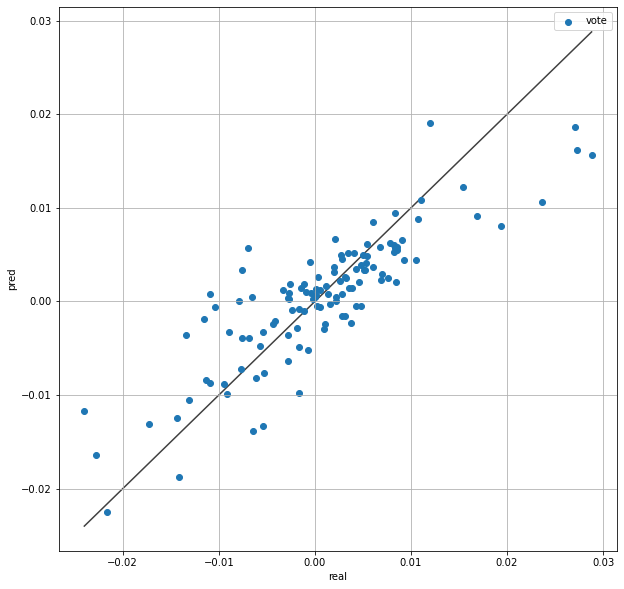

In [68]:
voting_df = pd.DataFrame(voting_df)
lims = [
    np.min([voting_df.min().min(), voting_df.min().min()]),  # min of both axes
    np.max([voting_df.max().max(), voting_df.max().max()]),  # max of both axes
]

# now plot both limits against eachother
plt.figure(figsize=(10,10))
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.scatter(voting_df.real, voting_df.preds, marker='o', label='vote')
plt.xlabel('real')
plt.ylabel('pred')
plt.grid()
plt.legend()
plt.show()

# 나. 주말간 해외지수 변동에 따른 코스피의 시작가 대비 종가 예측
- 국내 주식시장의 휴장기간동안 해외 지수 변동을 확인
- 국내주식 개장일에 KOSPI 시작가 대비 종가의 변동률을 예측 

## 1. 반등률 예측 데이터 전처리

In [83]:
# 시작가 대비 종가 비율 칼럼을 지정
kospi['KOSPI_u'] = (kospi.Close - kospi.Open) / kospi.Open

In [84]:
change_dfs = [nasdaq['NASDAQ'], snp['S&P500'], ftse['FTSE'], dax['DAX'], nikkei['NIKKEI'],
              hangseng['HANGSENG'], sanghai['SANGHAI'],kospi['KOSPI_x'], kospi['KOSPI_y'], kospi['KOSPI_u']]
final_df = pd.concat(change_dfs, axis=1, join='outer')
final_df = pd.merge(pd.DataFrame(pd.date_range('2001-01-01', '2021-11-11')).set_index(0),final_df,how='outer', left_index=True, right_index=True)

In [85]:
final_df.head(15)

,NASDAQ,S&P500,FTSE,DAX,NIKKEI,HANGSENG,SANGHAI,KOSPI_x,KOSPI_y,KOSPI_u
2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035048
2001-01-03,0.141716,0.050099,NaN,NaN,NaN,-0.018854,0.009713,0.000921,-0.015760,0.016948
2001-01-04,-0.019070,-0.010552,0.024123,-0.009079,NaN,0.044240,-0.003056,0.070172,0.057726,0.011767
2001-01-05,-0.062023,-0.026242,0.002021,0.000905,NaN,0.013953,0.003726,0.040913,0.002724,0.038085
2001-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,-0.004860,-0.001918,-0.007825,0.001545,NaN,-0.000717,-0.010935,0.009985,-0.012275,0.022537
2001-01-09,0.018949,0.003812,-0.010001,0.001932,-0.018540,0.004150,-0.000438,0.005574,-0.004773,0.010397
2001-01-10,0.033957,0.009586,-0.004517,-0.013186,-0.013068,-0.004180,0.011646,-0.049346,-0.005577,-0.044014


In [86]:
final_df['NASDAQ'] = final_df['NASDAQ'].shift(1)
final_df['S&P500'] = final_df['S&P500'].shift(1)
final_df['FTSE'] = final_df['FTSE'].shift(1)
final_df['DAX'] = final_df['DAX'].shift(1)

In [87]:
final_df['NASDAQ'].fillna(0, inplace=True)
final_df['S&P500'].fillna(0, inplace=True)
final_df['FTSE'].fillna(0, inplace=True)
final_df['DAX'].fillna(0, inplace=True)
final_df['NIKKEI'].fillna(0, inplace=True)
final_df['HANGSENG'].fillna(0, inplace=True)
final_df['SANGHAI'].fillna(0, inplace=True)
final_df['KOSPI_x'].fillna(0, inplace=True)

In [88]:
final_df = final_df.loc['2001-01-03':'2021-11-11']

In [89]:
final_df.head(15)

,NASDAQ,S&P500,FTSE,DAX,NIKKEI,HANGSENG,SANGHAI,KOSPI_x,KOSPI_y,KOSPI_u
2001-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,-0.018854,0.009713,0.000921,-0.015760,0.016948
2001-01-04,0.141716,0.050099,0.000000,0.000000,0.000000,0.044240,-0.003056,0.070172,0.057726,0.011767
2001-01-05,-0.019070,-0.010552,0.024123,-0.009079,0.000000,0.013953,0.003726,0.040913,0.002724,0.038085
2001-01-06,-0.062023,-0.026242,0.002021,0.000905,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2001-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2001-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000717,-0.010935,0.009985,-0.012275,0.022537
2001-01-09,-0.004860,-0.001918,-0.007825,0.001545,-0.018540,0.004150,-0.000438,0.005574,-0.004773,0.010397
2001-01-10,0.018949,0.003812,-0.010001,0.001932,-0.013068,-0.004180,0.011646,-0.049346,-0.005577,-0.044014
2001-01-11,0.033957,0.009586,-0.004517,-0.013186,-0.017240,-0.022352,-0.003044,0.001747,0.013284,-0.011386
2001-01-12,0.046114,0.010318,0.008960,0.022965,0.011110,0.013561,-0.006790,0.046423,0.030545,0.015407


In [90]:
holiday_index = final_df.KOSPI_y[final_df.KOSPI_y.isnull()].index

In [91]:
# N번째 휴일의 시작 날짜, 처음 값을 0번째 인덱스 값으로 지정.
start_day = holiday_index[0]

# N번째 휴일의 종료 날짜
end_day = None

# 휴일기간을 담기위한 목록
holiday_list = []

for i in range(1, len(holiday_index)) :
    
    # N번째 휴일 날짜를 N-1번째 휴일 날짜와 비교해서, 날짜의 차이가 1일이면
    if (holiday_index[i] - holiday_index[i-1]) == timedelta(days=1) :
        
        # 연속된 휴일로 보고 휴일 종료 날짜를 +1일
        end_day = holiday_index[i]
        
    # N번째 휴일 날짜와 N-1번째 휴일 날짜를 비교해서, 날짜의 차이가 1일이 아니면 -> 새로운 휴일의 시작으로 보고 시작과 끝을 바꿔줌.
    else :
        
        # 새로운 휴일을 시작하기 전에 정해진(이전 휴일기간)의 시작과 끝 날짜를 리스트에 담아줌.
        holiday_list.append((start_day, end_day))
        
        # 새로운 휴일 시작 날짜를 새로 지정
        start_day = holiday_index[i]
        
        # 새로운 휴일 종료 날짜도 새로 지정
        end_day = holiday_index[i]

In [107]:
one_day = timedelta(days=1)

X_u = []
y_u = []

for idx in range(len(holiday_list)) :
    
    #휴일 시작일
    holiday_start = holiday_list[idx][0]
    
    #휴일 종료일
    holiday_end = holiday_list[idx][1]
    
    # 타겟 날짜(휴일 다음날의 날짜)
    target_day = holiday_end + one_day
    
    # 휴일기간 및 D+1일 지수 변동 데이터
    n_holiday = final_df.loc[holiday_start : target_day]
    
    # 휴일 기간 동안 지수들의 누적 변동률
    n_holiday_change = (n_holiday + 1).cumprod() - 1
    
    # 휴일 다음날의 누적 변동률
    datas = n_holiday_change.loc[target_day]

    # KOSPI, KOSDAQ을 제외한 지수들의 누적변동률 데이터
    X_data = datas.drop(['KOSPI_y', 'KOSPI_x', 'KOSPI_u'])
    X_data['KOSPI'] = final_df.loc[holiday_start - one_day]['KOSPI_x']
    
    # 반등을 예측하고자 하는 날의 변동율 예측 데이터를 추가
    X_data['KOSPI_preds'] = voting.predict(np.array(X_data.values).reshape(1,-1))[0]
    
    # D+1일 KOSPI의 실제 변동률 y
    y_data = datas['KOSPI_u']

    X_u.append(X_data.values)
    y_u.append(y_data)

In [126]:
X_u

[array([-0.06202275, -0.02624237,  0.00202082,  0.00090488,  0.        ,
        -0.00071726, -0.01093493,  0.04091251, -0.01499233]),
 array([-0.0053397 , -0.00623295,  0.00827487,  0.00383901,  0.01187392,
        -0.00010853, -0.03435562,  0.04642304,  0.00082955]),
 array([ 6.86292216e-04, -4.02827956e-03, -9.66199134e-05,  2.37651754e-03,
         3.09526260e-03,  1.04006954e-02,  0.00000000e+00,  2.60408907e-02,
         9.12402284e-04]),
 array([-0.00581144,  0.01115051,  0.00745656,  0.01141993, -0.02397021,
        -0.00342003,  0.        ,  0.01237536,  0.00051107]),
 array([ 0.00980285, -0.00188581,  0.00618646, -0.00479971,  0.0108951 ,
         0.00346605,  0.        , -0.05692884,  0.00675586]),
 array([-0.04394854, -0.01747399,  0.00073579, -0.00991546, -0.02321356,
        -0.01496146, -0.02787554, -0.00623877, -0.0154681 ]),
 array([-0.03555677, -0.01333553, -0.00673531, -0.0210553 ,  0.        ,
        -0.01135052,  0.00217172,  0.00659263, -0.01192178]),
 array([-0.

In [109]:
y_u

[0.022537126124241746,
 0.006621181057372416,
 0.007919424275525389,
 -0.051228193945613065,
 0.006393926613243339,
 -0.026474592795548868,
 0.019706613117320693,
 0.001695598160024181,
 0.0002734294893704803,
 -0.026400515132002478,
 0.029329837784696,
 -0.01679414099141363,
 0.00468185920577624,
 0.0022579164754474856,
 -0.010296603657599324,
 -0.022854495618268023,
 -0.011151529608205646,
 -0.012049363521523526,
 0.0033089484698349825,
 0.02108092812676854,
 -0.004383645760485666,
 0.012939817959516375,
 -0.0017944730230887718,
 0.019921894310148902,
 -0.0027894227668494587,
 0.0030374675729814005,
 0.01154338022480994,
 -0.006906573490513712,
 -0.014376841628080173,
 0.0010881028508293866,
 0.006256007284623166,
 -0.009445643329677789,
 -0.004533667011225373,
 -0.018894979489599728,
 -0.020168224299065396,
 -0.01577257969303436,
 0.008234169145771242,
 0.00630282194528009,
 0.017087133878394223,
 -0.0031465335395864935,
 0.002216603747445589,
 -0.005852996220322093,
 0.005000091242

## 2. 반등률 예측 모델 (Regression)

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_u, y_u)

In [111]:
lr_u = LinearRegression()
ridge_u = Ridge(alpha=10)
rfr_u = RandomForestRegressor(max_depth=12, min_samples_split=0.01, n_estimators=200)
gbr_u = GradientBoostingRegressor(min_samples_leaf=4, min_samples_split=0.05)
lgbm_u = lightgbm.LGBMRegressor(boosting='gbdt', learning_rate=0.01, n_estimators=500)

In [112]:
lr_u.fit(X_train, y_train)
ridge_u.fit(X_train, y_train)
rfr_u.fit(X_train, y_train)
gbr_u.fit(X_train, y_train)
lgbm_u.fit(X_train, y_train)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


LGBMRegressor(boosting='gbdt', learning_rate=0.01, n_estimators=500)

In [113]:
print('---------- train ----------')
print('LinearRegression:',lr_u.score(X_train, y_train))
print('Ridge:',ridge_u.score(X_train, y_train))
print('RandomForest:',rfr_u.score(X_train, y_train))
print('GradientBoosting:',gbr_u.score(X_train, y_train))
print('LGBM:',lgbm_u.score(X_train, y_train))

print('---------- test ----------')
print('LinearRegression:',lr_u.score(X_test, y_test))
print('Ridge:',ridge_u.score(X_test, y_test))
print('RandomForest:',rfr_u.score(X_test, y_test))
print('GradientBoosting:',gbr_u.score(X_test, y_test))
print('LGBM:',lgbm_u.score(X_test, y_test))

---------- train ----------
LinearRegression: 0.25871820862594097
Ridge: 0.0135664363668625
RandomForest: 0.7124407950289974
GradientBoosting: 0.5950195084490263
LGBM: 0.7402967246993386
---------- test ----------
LinearRegression: 0.32741621673156285
Ridge: 0.014744655890812197
RandomForest: 0.3070699214755398
GradientBoosting: 0.303758063132923
LGBM: 0.29973359477907346


In [114]:
lr_preds = lr_u.predict(X_test)
ridge_preds = ridge_u.predict(X_test)
rfr_preds = rfr_u.predict(X_test)
gbr_preds = gbr_u.predict(X_test)
lgbm_preds = lgbm_u.predict(X_test)

In [115]:
score_dict = {
    'lr' : lr_preds,
    'ridge' : ridge_preds,
    'gbr' : gbr_preds,
    'rfr' : rfr_preds,
    'lgbm' : lgbm_preds,
    'real' : y_test
}

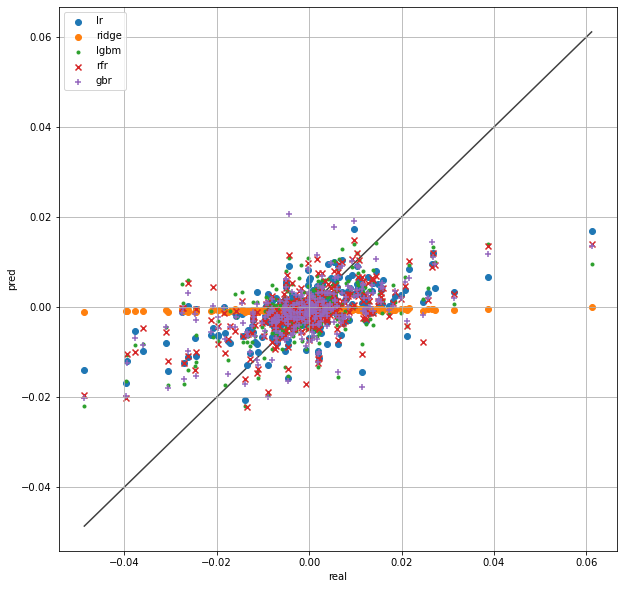

In [116]:
pred_df = pd.DataFrame(score_dict)
lims = [
    np.min([pred_df.min().min(), pred_df.min().min()]),  # min of both axes
    np.max([pred_df.max().max(), pred_df.max().max()]),  # max of both axes
]

# now plot both limits against eachother
plt.figure(figsize=(10,10))
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.scatter(pred_df.real, pred_df.lr, marker='o', label='lr')
plt.scatter(pred_df.real, pred_df.ridge, marker='o', label='ridge')
plt.scatter(pred_df.real, pred_df.lgbm, marker='.', label='lgbm')
plt.scatter(pred_df.real, pred_df.rfr, marker='x', label='rfr')
plt.scatter(pred_df.real, pred_df.gbr, marker='+', label='gbr')
plt.xlabel('real')
plt.ylabel('pred')
plt.grid()
plt.legend()
plt.show()

## 3. VotingRegression을 통한 예측

In [117]:
estimators = [('lr', lr),('rfr', rfr), ('gbr', gbr), ('lgbm', lgbm)]

In [118]:
voting_u = VotingRegressor(estimators = estimators)
voting_u.fit(X_train, y_train)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rfr',
                             RandomForestRegressor(max_depth=9,
                                                   max_features='sqrt',
                                                   min_samples_split=0.01,
                                                   n_estimators=150)),
                            ('gbr',
                             GradientBoostingRegressor(min_samples_leaf=4,
                                                       min_samples_split=0.1)),
                            ('lgbm',
                             LGBMRegressor(boosting='gbdt', learning_rate=0.01,
                                           max_depth=3, n_estimators=500))])

In [119]:
print('train:', voting_u.score(X_train, y_train))
print('test:', voting_u.score(X_test, y_test))

train: 0.4821649384188357
test: 0.3239352920397681


In [120]:
vot_preds = voting_u.predict(X_test)

In [121]:
voting_df = {
    'preds' : vot_preds,
    'real' : y_test
}

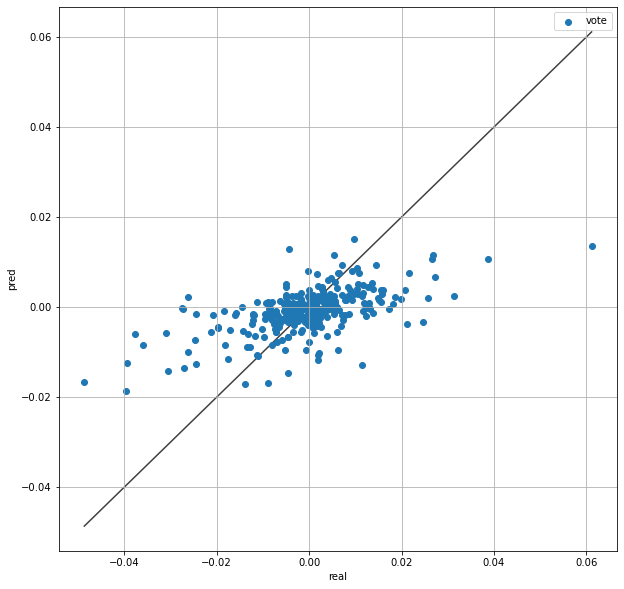

In [122]:
voting_df = pd.DataFrame(voting_df)
lims = [
    np.min([voting_df.min().min(), voting_df.min().min()]),  # min of both axes
    np.max([voting_df.max().max(), voting_df.max().max()]),  # max of both axes
]

# now plot both limits against eachother
plt.figure(figsize=(10,10))
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.scatter(voting_df.real, voting_df.preds, marker='o', label='vote')
plt.xlabel('real')
plt.ylabel('pred')
plt.grid()
plt.legend()
plt.show()